In [10]:
import numpy as np
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optimizers
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
np.random.seed(0)
torch.manual_seed(0)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [12]:
N = 3000
x, t = datasets.make_moons(N, noise = 0.3)
t = t.reshape(N, 1)
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2)

In [13]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.l1 = nn.Linear(input_dim, hidden_dim)
        self.a1 = nn.Sigmoid()
        self.l2 = nn.Linear(hidden_dim, output_dim)
        self.a2 = nn.Sigmoid()
        
        self.layers = [self.l1, self.a1, self.l2, self.a2]
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        
        return x

In [14]:
model = MLP(2, 3, 1).to(device)

In [15]:
criterion = nn.BCELoss()
optimizer = optimizers.SGD(model.parameters(), lr = 0.1)

def compute_loss(t, y):
    return criterion(y, t)

def train_step(x, t):
    model.train()                              #学習モードへ移行 model.eval()で評価モード
    preds = model(x)
    loss = compute_loss(t, preds)
    optimizer.zero_grad()              #勾配初期化
    loss.backward()                         #勾配計算
    optimizer.step()                         #パラメータ更新
    return loss

In [16]:
epochs = 100
batch_size = 64
n_batches = x_train.shape[0] // batch_size
for epoch in range(epochs):
    train_loss = 0.
    x_, t_ = shuffle(x_train, t_train)
    x_ = torch.Tensor(x_).to(device)
    t_ = torch.Tensor(t_).to(device)
    for n_batches in range(n_batches):
        start = n_batches * batch_size
        end = start + batch_size
        loss = train_step(x_[start:end], t_[start:end])
        train_loss += loss.item()
    
    print('epoch:{}, loss{:.3}'.format(epoch+1, train_loss))

epoch:1, loss26.3
epoch:2, loss25.0
epoch:3, loss24.2
epoch:4, loss23.3
epoch:5, loss22.4
epoch:6, loss21.4
epoch:7, loss20.4
epoch:8, loss19.2
epoch:9, loss18.1
epoch:10, loss17.0
epoch:11, loss15.9
epoch:12, loss14.7
epoch:13, loss13.7
epoch:14, loss12.8
epoch:15, loss11.8
epoch:16, loss11.1
epoch:17, loss10.1
epoch:18, loss9.45
epoch:19, loss8.78
epoch:20, loss8.26
epoch:21, loss7.61
epoch:22, loss6.93
epoch:23, loss6.72
epoch:24, loss5.87
epoch:25, loss5.68
epoch:26, loss5.11
epoch:27, loss4.88
epoch:28, loss4.26
epoch:29, loss3.75
epoch:30, loss3.43
epoch:31, loss2.73
epoch:32, loss2.55
epoch:33, loss2.08
epoch:34, loss1.62
epoch:35, loss1.32
epoch:36, loss0.843
epoch:37, loss0.456
epoch:38, loss0.0
epoch:39, loss0.0
epoch:40, loss0.0
epoch:41, loss0.0
epoch:42, loss0.0
epoch:43, loss0.0
epoch:44, loss0.0
epoch:45, loss0.0
epoch:46, loss0.0
epoch:47, loss0.0
epoch:48, loss0.0
epoch:49, loss0.0
epoch:50, loss0.0
epoch:51, loss0.0
epoch:52, loss0.0
epoch:53, loss0.0
epoch:54, loss0.

In [17]:
def test_step(x, t):
    x = torch.Tensor(x).to(device)
    t = torch.Tensor(t).to(device)
    model.eval()
    preds = model(x)
    loss = compute_loss(t, preds)
    return loss, preds

loss, preds = test_step(x_test, t_test)
test_loss = loss.item()
preds = preds.data.cpu().numpy()>0.5
test_acc = accuracy_score(t_test, preds)

print('test_loss{:.3f}, test_acc:{:.3f}'. format(test_loss, test_acc))

test_loss0.388, test_acc:0.842


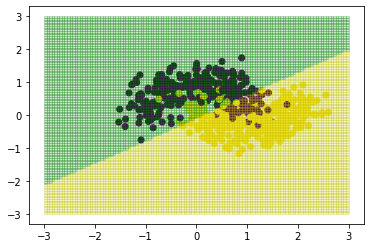

In [18]:
for i in range(120):
    for j in range(120):
        x_ = np.array([[(i-60)*0.05, (j-60)*0.05]])
        x_ = torch.Tensor(x_).to(device)
        m = model(x_)
        if m[0, 0] > 0.5:
            plt.fill([x_[0, 0], x_[0, 0], x_[0, 0]+0.05, x_[0, 0]+0.05], [x_[0, 1], x_[0, 1]+0.05, x_[0, 1]+0.05, x_[0, 1]],color="y",alpha=0.2)
        else:
             plt.fill([x_[0, 0], x_[0, 0], x_[0, 0]+0.05, x_[0, 0]+0.05], [x_[0, 1], x_[0, 1]+0.05, x_[0, 1]+0.05, x_[0, 1]],color="g",alpha=0.2)

plt.scatter(x_test[:, 0], x_test[:, 1], c=t_test.T[0])
plt.show()